In [2]:
import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from get_x_distribution import get_x_distribution
from likelihood import likelihood
from posterior import posterior

warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

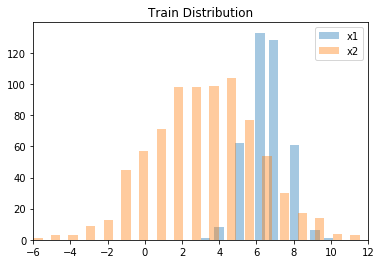

In [3]:
mat = scipy.io.loadmat('data.mat')
x1_train = mat['x1_train']
x1_test = mat['x1_test']
x2_train = mat['x2_train']
x2_test = mat['x2_test']
all_x = np.concatenate([x1_train,x1_test,x2_train,x2_test],axis=1)
r = [np.min(all_x),np.max(all_x)]

train_x = get_x_distribution(x1_train,x2_train,r)
test_x = get_x_distribution(x1_test,x2_test,r)


sns.distplot(x1_train,kde=False,label='x1',bins=r[1]-r[0]+1,hist_kws={"width": 0.5})
sns.distplot(x2_train,kde=False,label='x2',bins=r[1]-r[0]+1,hist_kws={"width": 0.5})
plt.legend()
plt.xlim((r[0],r[1]))

plt.title('Train Distribution');

## Part1 likelihood: 

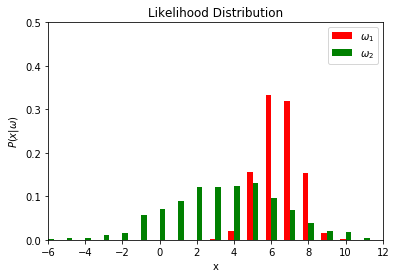

In [4]:
l = likelihood(train_x)
width=0.3
plt.bar(np.arange(r[0],r[1]+1)-width/2, l[0],width=width,label='$\omega_1$',color='r')
plt.bar(np.arange(r[0],r[1]+1)+width/2, l[1],width=width,label='$\omega_2$',color='g')
plt.axis([r[0], r[1], 0, 0.5])
plt.title('Likelihood Distribution')
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend();

In [5]:
# compute the number of all the misclassified x using maximum likelihood decision rule
pred_label_ml = np.argmax(l,axis=0)
error_c1 = sum([test_x[0][f-r[0]] for f in range(r[0],r[1]+1) if pred_label_ml[f-r[0]]!=0 ])
error_c2 = sum([test_x[1][f-r[0]] for f in range(r[0],r[1]+1) if pred_label_ml[f-r[0]]!=1 ])
error_num = error_c1+error_c2
error_r = error_num/np.sum(test_x)
print("Error number: %d. Error rate: %f."%(error_num,error_r))

Error number: 64. Error rate: 0.213333.


## Part2 Posterior: 

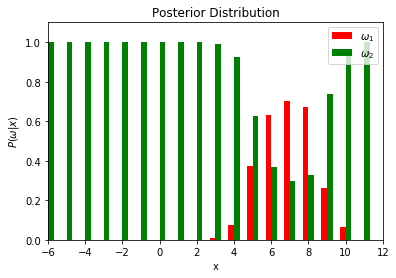

In [6]:
pos = posterior(train_x)
width=0.3
plt.bar(np.arange(r[0],r[1]+1)-width/2, pos[0],width=width,label='$\omega_1$',color='r')
plt.bar(np.arange(r[0],r[1]+1)+width/2, pos[1],width=width,label='$\omega_2$',color='g')
plt.axis([r[0], r[1], 0, 1.1])
plt.title('Posterior Distribution')
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend();

In [7]:
# compute the number of all the misclassified x using optimal bayes decision rule
pred_label_p = np.argmax(pos,axis=0)
error_c1 = sum([test_x[0][f-r[0]] for f in range(r[0],r[1]+1) if pred_label_p[f-r[0]]!=0])
error_c2 = sum([test_x[1][f-r[0]] for f in range(r[0],r[1]+1) if pred_label_p[f-r[0]]!=1])
error_num = error_c1+error_c2
error_r = error_num/np.sum(test_x)
print("Error number: %d. Error rate: %f."%(error_num,error_r))

Error number: 47. Error rate: 0.156667.


# Part3 risk

In [34]:
risk_mat = np.array([[0,1],[2,0]])

risk = risk_mat@pos

risk_mat = np.array([[0,1],[2,0]])

risk = risk_mat@pos
total_risk = np.min(risk,axis=0)@np.sum(test_x,axis=0)

print("Risk: %f."%(total_risk))

Risk: 70.934648.
